In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns


In [3]:
# Load data
data = pd.read_csv('BankCustomers.csv')
X = data.iloc[:, 3:13]  # Select columns 3 to 12
y = data.iloc[:, 13].values  # Target column


In [4]:
# Convert categorical columns to dummy variables
if 'Geography' in X.columns:
    states = pd.get_dummies(X['Geography'], drop_first=True)
    X = pd.concat([X, states], axis=1)
else:
    print("Column 'Geography' not found in X")

if 'Gender' in X.columns:
    gender = pd.get_dummies(X['Gender'], drop_first=True)
    X = pd.concat([X, gender], axis=1)
else:
    print("Column 'Gender' not found in X")

# Drop original categorical columns
X = X.drop(['Geography', 'Gender'], axis=1)


In [5]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [6]:
# Build ANN model
classifier = Sequential()
classifier.add(Dense(activation='relu', input_dim=11, units=6, kernel_initializer="uniform"))  # input layer and first hidden layer
classifier.add(Dense(activation='relu', units=6, kernel_initializer="uniform"))  # second hidden layer
classifier.add(Dense(activation='sigmoid', units=1, kernel_initializer='uniform'))  # output layer

# Compile the model
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
classifier.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100


C:\Users\Vivobook 15\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7878 - loss: 0.6215
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7951 - loss: 0.5225
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8033 - loss: 0.5019
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7915 - loss: 0.5190
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7950 - loss: 0.5113
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7981 - loss: 0.5010
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7954 - loss: 0.5053
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7978 - loss: 0.5038
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8002 - loss: 0.4944
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8032 - loss: 0.4900
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7925 - loss: 0.5061
Epoch 12/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8018 - loss: 0.4885
Epoch 69/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8035 - loss: 0.4888
Epoch 70/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7905 - loss: 0.5059
Epoch 71/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7946 - loss: 0.5023
Epoch 72/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7970 - loss: 0.4974
Epoch 73/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8030 - loss: 0.4902
Epoch 74/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7974 - loss: 0.4973
Epoch 75/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8062 - loss: 0.4863
Epoch 76/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7966 - loss: 0.4952
Epoch 77/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7953 - loss: 0.5022
Epoch 78/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7962 - loss: 0.4969
Epoch 79/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [7]:
# Predict test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary outcome

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [8]:
# Evaluate model performance
confuse_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", confuse_matrix)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[1595    0]
 [ 405    0]]
Accuracy: 0.7975


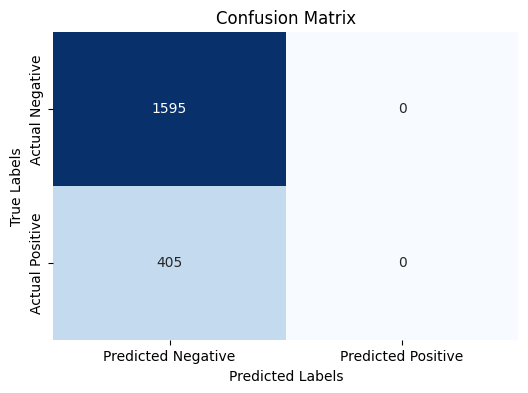

In [9]:
# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confuse_matrix, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()
